In [1]:
# import section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from ipywidgets import *

In [2]:
print('seaborn version', sns.__version__)

seaborn version 0.9.0


### Simple plot

$f(x) = x^2$

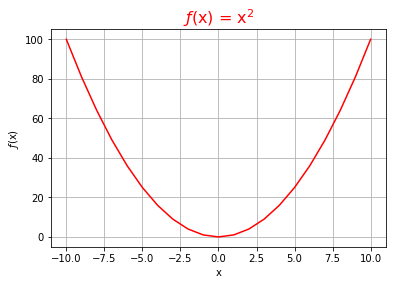

In [3]:
x = np.array(np.arange(-10, 11))
y = x ** 2
plt.plot(x, y, color='r', linewidth=1.5)
plt.title(r'$ƒ$(x) = x$^2$', fontsize=16, color='r') # LaTeX function in title!
plt.xlabel('x')
plt.ylabel(r'$ƒ$(x)')
plt.grid(True)
plt.show()

### Jupyter Widgets

For a complete list see: [https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [4]:
widgets.IntSlider(value=4, min=0, max=10, step=2, description='Demo')

IntSlider(value=4, description='Demo', max=10, step=2)

In [5]:
widgets.IntRangeSlider(value=[3, 7], min=0, max=10, step=1, description='Demo',)

IntRangeSlider(value=(3, 7), description='Demo', max=10)

In [6]:
widgets.RadioButtons(options=['A', 'B', 'C'], value='B', description='Demo')

RadioButtons(description='Demo', index=1, options=('A', 'B', 'C'), value='B')

In [7]:
widgets.Dropdown(options=[char for char in 'ABCDE'], value='B', description='Demo')

Dropdown(description='Demo', index=1, options=('A', 'B', 'C', 'D', 'E'), value='B')

In [8]:
widgets.Select(options=[char for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'],
               value='D',
               rows=5,
               description='Demo')

Select(description='Demo', index=3, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', …

In [9]:
widgets.ToggleButtons(options=['A', 'B', 'C'],
                      description='Demo',
                      value='B',
                      tooltips=['Omschrijving A', 'Omschrijving B', 'Omschrijving C']
)

ToggleButtons(description='Demo', index=1, options=('A', 'B', 'C'), tooltips=('Omschrijving A', 'Omschrijving …

### Interactive plot!

In [10]:
def demo(macht):
    x = np.linspace(-20, 21, 200)
    y = x**macht
    plt.plot(x, y, color='b', linewidth=1.5)
    plt.title(r'$ƒ$(x) = x$^{}$'.format(macht), fontsize=16, color='b') # LaTeX function in title!
    plt.xlabel('x')
    plt.ylabel(r'$ƒ$(x)')
    plt.grid(True)
    return plt.show()

interact(demo,
         macht = widgets.IntSlider(value=2, min=1, max=7, description='Macht'))

interactive(children=(IntSlider(value=2, description='Macht', max=7, min=1), Output()), _dom_classes=('widget-…

<function __main__.demo(macht)>

### Multiple widgets

In [11]:
def demo(macht, xrange, font, lijn, raster, kleur):
    x = np.linspace(xrange[0], xrange[1]+1, 100)
    y = x**macht
    plt.plot(x, y, color=kleur, linewidth=lijn)
    plt.title(r'$ƒ$(x) = x$^{}$'.format(macht), fontsize=font, color=kleur) # LaTeX function in title!
    plt.xlabel('x')
    plt.ylabel(r'$ƒ$(x)')
    plt.grid(raster)
    return plt.show()

interact(demo,
         macht = widgets.IntSlider(value=2, min=0, max=7, description='Macht'),
         xrange = widgets.IntRangeSlider(value=[-20, 20], min=-50, max=50, step=5, description='x'),
         font = widgets.RadioButtons(options=[12, 16, 18, 20], value=18, description='Lettergrootte'),
         lijn = widgets.FloatSlider(value=5, min=0, max=7.5, step=0.5, description='Lijndikte', readout_format='.1f'),
         kleur = widgets.ToggleButtons(options=['red', 'green', 'blue', 'purple', 'orange'], description='Kleur',
                                       value='purple', tooltips=['Rood', 'Groen', 'Blauw', 'Paars', 'Oranje']),
         raster = widgets.Checkbox(value=True, description='Raster', disabled=False)
        )

interactive(children=(IntSlider(value=2, description='Macht', max=7), IntRangeSlider(value=(-20, 20), descript…

<function __main__.demo(macht, xrange, font, lijn, raster, kleur)>

### Filter Data

In [12]:
iris = sns.load_dataset('iris')

def iris_filter(sepal_length, sepal_width, petal_length, petal_width):
    selection = iris[(iris.sepal_length >= sepal_length[0]) & (iris.sepal_length <= sepal_length[1]) &
                     (iris.petal_length >= petal_length[0]) & (iris.petal_length <= petal_length[1]) &
                     (iris.sepal_width >= sepal_width[0]) & (iris.sepal_width <= sepal_width[1]) &
                     (iris.petal_width >= petal_width[0]) & (iris.petal_width <= petal_width[1])]
    print('Aantal rijen in selectie: {}'.format(selection.shape[0]))
    return selection

interact(iris_filter,
         sepal_length = widgets.FloatRangeSlider(value = [5, 6],
                                                          min = iris.sepal_length.min(),
                                                          max = iris.sepal_length.max(),
                                                          step=0.1, readout_format='.1f'),
         petal_length = widgets.FloatRangeSlider(value = [2, 5],
                                                          min = iris.petal_length.min(),
                                                          max = iris.petal_length.max(),
                                                          step=0.1, readout_format='.1f'),
         sepal_width = widgets.FloatRangeSlider(value = [3, 4],
                                                          min = iris.sepal_width.min(),
                                                          max = iris.sepal_width.max(),
                                                          step=0.1, readout_format='.1f'),
         petal_width = widgets.FloatRangeSlider(value = [1, 2],
                                                          min = iris.petal_width.min(),
                                                          max = iris.petal_width.max(),
                                                          step=0.1, readout_format='.1f'))

interactive(children=(FloatRangeSlider(value=(5.0, 6.0), description='sepal_length', max=7.9, min=4.3, readout…

<function __main__.iris_filter(sepal_length, sepal_width, petal_length, petal_width)>

### Visualize Data (with seaborn)

For nice seaborn plot examples, have a look at the [Example gallery](https://seaborn.pydata.org/examples).

In [13]:
sns.set(style='white')
iris = sns.load_dataset('iris')

def graph(x, y, species, type):
    sns.jointplot(x=x, y=y, data=iris[iris.species == species], kind=type)
    return plt.show()

interact(graph,
         type = widgets.ToggleButtons(options=['kde', 'reg', 'scatter', 'resid', 'hex'], description='Type'),
         species = widgets.RadioButtons(options=iris.species.unique(), description='Species', value='virginica'),
         x = widgets.Dropdown(options=iris.columns[:-1], description='X-axis', value='petal_length'),
         y = widgets.Dropdown(options=iris.columns[:-1], description='Y-axis', value='petal_width')
        )

interactive(children=(Dropdown(description='X-axis', index=2, options=('sepal_length', 'sepal_width', 'petal_l…

<function __main__.graph(x, y, species, type)>

## Unsupervised learning: _k_-Means (with centroids)

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data[:,:2]

def kmeans(k):
    model = KMeans(n_clusters=k) # Create a KMeans instance with 3 clusters: model
    model.fit(data) # Fit model to points
    labels = model.predict(data)
    plt.scatter(x=data[:,0], y=data[:,1], c=labels, alpha=0.7, cmap='tab10')#Accent
    plt.scatter(x= model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], marker='D', s=125, c='red')
    plt.title(r'$k$-Means ($k$ = {})'.format(k), fontsize=18, color='red')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    return plt.show()

interact(kmeans, k = widgets.IntSlider(value=5, min=1, max=10, description='Clusters'))

interactive(children=(IntSlider(value=5, description='Clusters', max=10, min=1), Output()), _dom_classes=('wid…

<function __main__.kmeans(k)>

**>>> Maak opdracht 11 uit het [Jupyter Notebook](https://nbviewer.jupyter.org/github/Brinkhuis/Cursus/blob/master/notebooks/opdrachten.ipynb) met de opdrachten.**

Wat je wellicht is opgevallen bij het maken van opdracht 11, is dat de interactie niet heel erg vlot was.  
Dat kwam niet zozeer door de hoeveelheid data, maar door de tijd die was om de complexe plot op te bouwen.

De responsetijd van de interactie kan worden versneld door alle mogelijke plots van te voren te maken en op te slaan, bijvoorbeeld in een dictionary.  
Daarmee zijn ze direct beschikbaar om te tonen en hoeven de plots bij selectie niet telkes opnieuw opgebouwd te worden.  

Onderstaand een uitgewerkt stappenplan.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import *

In [16]:
# stap 1: importeer 'combinatons' from 'itertools'
from itertools import combinations

In [17]:
# stap 2: laad de data
iris = sns.load_dataset('iris')

In [18]:
# stap 3: sla alle mogelijke combinaties van 'species' op in een list
all_combinations = list()

for i in range(1, len(iris.species.unique()) + 1):
    for combi in combinations(iris.species.unique(), i):
        all_combinations.append(combi)

for combi in all_combinations:
    print(combi)

('setosa',)
('versicolor',)
('virginica',)
('setosa', 'versicolor')
('setosa', 'virginica')
('versicolor', 'virginica')
('setosa', 'versicolor', 'virginica')


In [19]:
# stap 4: sla voor elke combinatie de plot op in een dictionary
all_plots = dict()
for combi in all_combinations:
    all_plots[combi] = sns.PairGrid(iris[iris.species.isin(combi)], diag_sharey=False)
    all_plots[combi].map_lower(sns.kdeplot)
    all_plots[combi].map_upper(sns.scatterplot)
    all_plots[combi].map_diag(sns.kdeplot, lw=3)
    plt.close() # output hoeft niet naar scherm!

In [20]:
# stap 5: gebruik de dictionary met plots in de functie
def iris_pairgrid(species):
    return all_plots[species].fig # don't forget the .fig

o = iris.species.unique()      # parameters vooraf 'berekenen' scheelt tijd bij de interactie
r = len(iris.species.unique()) # parameters vooraf 'berekenen' scheelt tijd bij de interactie

interact(iris_pairgrid,
         species = widgets.SelectMultiple(options = o,
                                          value = ('versicolor', 'virginica'),
                                          rows = r,
                                          description = 'species',
                                          disabled = False))

interactive(children=(SelectMultiple(description='species', index=(1, 2), options=('setosa', 'versicolor', 'vi…

<function __main__.iris_pairgrid(species)>